In [101]:
import pandas as pd

df = pd.read_csv("../../membershipchainservice/Data/comparison_join.txt")
df["processed_time"] = pd.to_numeric(df["Time"]).apply(lambda x: x/1000)

max_time = max(df["processed_time"])
df

,Name,Registration,Time,epoch,processed_time
0,node_2,Manage Normally,0,0,0.000
1,node_0,Manage Normally,0,0,0.000
2,node_1,Manage Normally,0,0,0.000
3,node_3,Manage Normally,0,0,0.000
4,node_0,starts epoch,0,1,0.000
...,...,...,...,...,...
150,node_15,Wants As Usual,77757,10,77.757
151,node_1,Wants As Usual,77757,10,77.757
152,node_8,Wants As Usual,77757,10,77.757
153,node_6,Wants As Usual,77757,10,77.757


In [104]:
order_categ = ["Wants","Don't Manage", "Manage", "Manage Normally"]
nodes = list(df["Name"].unique())
dataset = []
d_wo = []
ticks = list(df[df["Registration"]=="starts epoch"]["processed_time"])
cols = ["Enter", "Rejected", "Wait", "Registrated", "Accepted", "Name"]
legend = ["Enter", "Rejected", "Wait", "Registrated", "Accepted", "Name"]
print(cols)

for n in nodes:
    df_filtered = df[df["Name"] == n][df["Registration"].isin(order_categ)].filter(items=["Registration", "processed_time"])
    df_dict = {r[1][0] : r[1][1] for r in df_filtered.iterrows()}
    
    vals = [df_dict.get(o,0) for o in order_categ]
    
    values= []
    wo = []
    

    
    if len(df_dict) == 1:
        values = [0]*(len(cols)-2)+[max_time]
        wo = [0]*(len(cols)-2)+[max_time]
    elif len(df_dict) == 2: 
        list_ticks = [t for t in ticks if t > vals[2]]
        if len(list_ticks)>0:
            next_tick = min(list_ticks)
        else: 
            next_tick = max_time
        approval_time = vals[2]-vals[0]
        next_epoch = next_tick-vals[2]
        values = [vals[0],0, approval_time,next_epoch, max_time-next_tick]
        
        wo = [vals[0],0,max_time-vals[0],0,0]
    elif len(df_dict) == 3:
        list_ticks = [t for t in ticks if t > vals[3]]
        if len(list_ticks)>0:
            next_tick = min(list_ticks)
        else: 
            next_tick = max_time
            
        registration_ticks = list(df.loc[df["Registration"]=="Wants As Usual"][df["Name"]==n]["processed_time"])
        list_reg_ticks = [t for t in registration_ticks if t > vals[2]]
        if len(list_reg_ticks)>0:
            next_reg_tick = min(list_reg_ticks)
        else: 
            next_reg_tick = max_time
       
        print(df_dict)
        
        next_epoch = next_tick-vals[3]
        values = [vals[0], next_reg_tick-vals[0], vals[3]-next_reg_tick, next_epoch, max_time-next_tick]
        wo = [vals[0],0,max_time-vals[0],0,0]
        print(vals,values,next_reg_tick, next_tick)
    else:
        values = vals
        wo = vals
            
    values.append(n)
    wo.append(n)
    dataset.append(values)
    d_wo.append(wo)


df_bars_control_plane = pd.DataFrame(dataset, columns=cols)
df_bars_wo_control_plane = pd.DataFrame(d_wo, columns=cols)

['Enter', 'Rejected', 'Wait', 'Registrated', 'Accepted', 'Name']
{'Wants': 2.506, "Don't Manage": 2.508, 'Manage Normally': 9.05}
[2.506, 2.508, 0, 9.05] [2.506, 2.544, 4.000000000000001, 5.007, 63.7] 5.05 14.057
{'Wants': 65.792, "Don't Manage": 65.793, 'Manage Normally': 72.66}
[65.792, 65.793, 0, 72.66] [65.792, 2.6709999999999923, 4.197000000000003, 5.091999999999999, 0.005000000000009663] 68.463 77.752


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

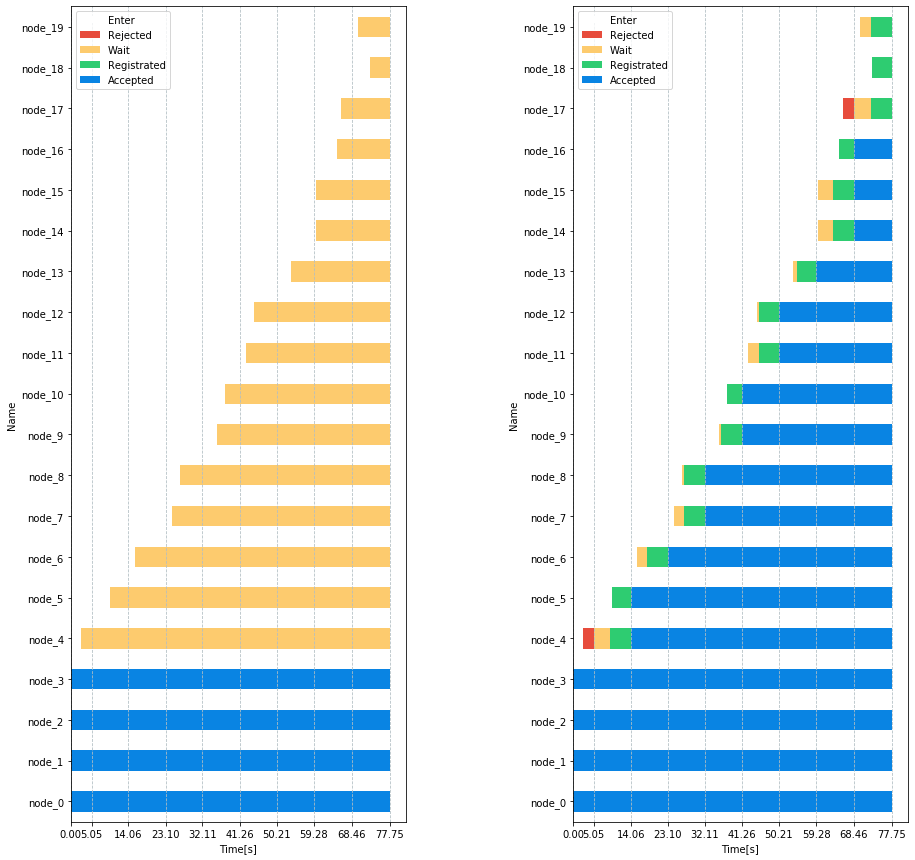

In [109]:
import matplotlib.pyplot as plt
plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0, 'wspace': 0.5}) 
size=15
df_bars_control_plane["index"] = df_bars_control_plane["Name"].apply(lambda s : int(s.split("_")[1]))
df_bars_wo_control_plane["index"] = df_bars_wo_control_plane["Name"].apply(lambda s : int(s.split("_")[1]))

ticks = list(df[df["Registration"]=="starts epoch"]["processed_time"])

colors = ["white","#e74c3c", "#fdcb6e", "#2ecc71", "#0984e3"]


d1 = df_bars_control_plane.set_index("Name").sort_values(by=['index']).filter(cols[:-1])
d1.plot.barh(stacked=True,
            figsize=(size, size),
            xticks=ticks,
            color=colors,
            ax=axes[1]
           )
axes[1].set_xlabel("Time[s]")
axes[1].grid(axis="x", color='#b2bec3', linestyle='--')
axes[1].legend(loc="upper left")


d2 = df_bars_wo_control_plane.set_index("Name").sort_values(by=['index']).filter(cols[:-1])
d2.plot.barh(stacked=True,
            figsize=(size, size),
            xticks=ticks,
            color=colors, 
            ax=axes[0]

           )
axes[0].set_xlabel("Time[s]")
axes[0].grid(axis="x", color='#b2bec3', linestyle='--')
axes[0].legend(loc="upper left")

fig.savefig('../../latex/thesis_template/figures/JoinSubplots.pdf')


In [132]:
df = pd.read_csv("../../membershipchainservice/Data/comparison_churn.txt")
df["processed_time"] = pd.to_numeric(df["Time"]).apply(lambda x: x/1000)
df["index"] = df["Name"].apply(lambda s : s.split("_")[1])
max_time = max(df["processed_time"])
df

,Name,Registration,Time,Epoch,processed_time,index
0,node_3,In the system,0,0,0.000,3
1,node_11,In the system,0,0,0.000,11
2,node_19,In the system,0,0,0.000,19
3,node_15,In the system,0,0,0.000,15
4,node_16,In the system,0,0,0.000,16
5,node_4,In the system,0,0,0.000,4
6,node_8,In the system,0,0,0.000,8
7,node_12,In the system,0,0,0.000,12
8,node_2,In the system,0,0,0.000,2
9,node_13,In the system,0,0,0.000,13


In [133]:
order_categ = ["In the system","churns", "left the system"]
nodes = list(df["Name"].unique())
print(order_categ)
dataset = []
d_wo = []
ticks = list(df[df["Registration"]=="starts epoch"]["processed_time"])
print(ticks)
for n in nodes:
    df_filtered = df[df["Name"] == n][df["Registration"].isin(order_categ)].filter(items=["Registration", "processed_time"])
    df_dict = {r[1][0] : r[1][1] for r in df_filtered.iterrows()}
    
    vals = [df_dict.get(o,0) for o in order_categ]
    
    values= []
    wo = [max_time, 0,0]
    
    print(df_dict)
    
    if len(df_dict) == 1:
        values = [max_time, 0,0]
    elif len(df_dict) == 3:
        list_ticks = [t for t in ticks if t > vals[2]]
        if len(list_ticks)>0:
            next_ticks = min(list_ticks)
        else: 
            next_ticks = max_time
        values = [vals[2], next_ticks-vals[2], max_time-next_ticks]
        wo = [vals[2], max_time-vals[2],0]
    else:
        values = vals
            
    values.append(n)
    wo.append(n)
    dataset.append(values)
    d_wo.append(wo)


df_bars_control_plane = pd.DataFrame(dataset, columns=["In the System", "Churns", "Out", "Name"])
df_bars_control_plane["index"] = df_bars_control_plane["Name"].apply(lambda s : int(s.split("_")[1]))
df_bars_wo_control_plane = pd.DataFrame(d_wo, columns=["In the System", "Churns", "Out", "Name"])
df_bars_wo_control_plane["index"] = df_bars_wo_control_plane["Name"].apply(lambda s : int(s.split("_")[1]))
df_bars_wo_control_plane

['In the system', 'churns', 'left the system']
[0.0, 8.784, 14.182, 22.171, 29.009, 34.488, 42.677, 48.333, 55.249]
{'In the system': 0.0}
{'In the system': 0.0, 'left the system': 34.49, 'churns': 36.994}
{'In the system': 0.0, 'left the system': 0.014, 'churns': 0.512}
{'In the system': 0.0, 'left the system': 14.184, 'churns': 14.697}
{'In the system': 0.0, 'left the system': 14.184, 'churns': 15.688}
{'In the system': 0.0}
{'In the system': 0.0}
{'In the system': 0.0, 'left the system': 34.491, 'churns': 36.994}
{'In the system': 0.0}
{'In the system': 0.0, 'left the system': 29.01, 'churns': 31.511}
{'In the system': 0.0, 'left the system': 22.175, 'churns': 22.672}
{'In the system': 0.0}
{'In the system': 0.0}
{'In the system': 0.0, 'left the system': 55.25, 'churns': 56.75}
{'In the system': 0.0, 'left the system': 48.336, 'churns': 48.84}
{'In the system': 0.0, 'left the system': 8.791, 'churns': 9.293}
{'In the system': 0.0}
{'In the system': 0.0}
{'In the system': 0.0}
{'In t

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,In the System,Churns,Out,Name,index
0,56.750,0.000,0,node_3,3
1,34.490,22.260,0,node_11,11
2,0.014,56.736,0,node_19,19
3,14.184,42.566,0,node_15,15
4,14.184,42.566,0,node_16,16
5,56.750,0.000,0,node_4,4
6,56.750,0.000,0,node_8,8
7,34.491,22.259,0,node_12,12
8,56.750,0.000,0,node_2,2
9,29.010,27.740,0,node_13,13


<Figure size 432x288 with 0 Axes>

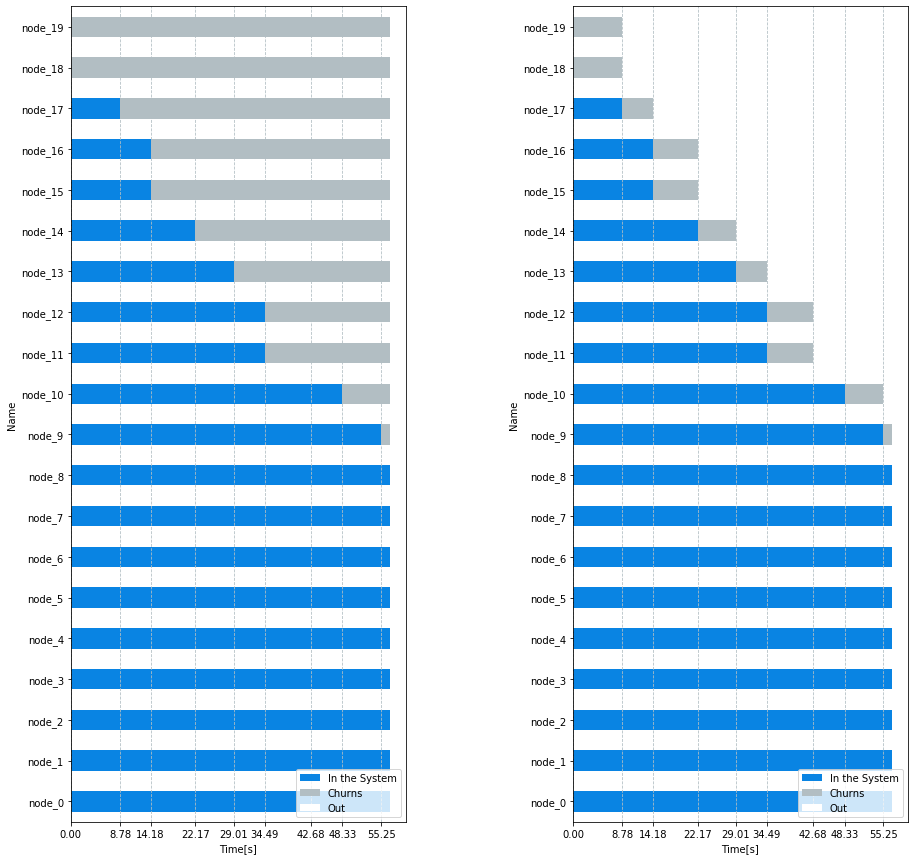

In [134]:
import matplotlib.pyplot as plt
plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0, 'wspace': 0.5}) 
size=15

df_bars_control_plane.set_index("Name").sort_values(
    by=['index']).filter(
    ["In the System", "Churns", "Out"]
    ).plot.barh(
    stacked=True,
    figsize=(size, size),
    xticks=ticks,
    color=["#0984e3", "#b2bec3", "white"],
    ax=axes[1]
   )
axes[1].set_xlabel("Time[s]")
axes[1].grid(axis="x", color='#b2bec3', linestyle='--')
axes[1].legend(loc="lower right")


df_bars_wo_control_plane.set_index("Name").sort_values(
    by=['index']
    ).filter(["In the System", "Churns", "Out"]).plot.barh(
        stacked=True,
        figsize=(size, size),
        xticks=ticks,
        color=["#0984e3", "#b2bec3", "white"], 
        ax=axes[0]
    )

axes[0].set_xlabel("Time[s]")
axes[0].grid(axis="x", color='#b2bec3', linestyle='--')
axes[0].legend(loc="lower right")

fig.savefig('../../latex/thesis_template/figures/ChurnSubplots.pdf')

In [140]:
## List of fill for Lottery graph
for i in range(60):
    h = 255.0/60*i
    string = str(hex(int(h)).lstrip("0x").rstrip("L"))
    print(h, 3*string)

0.0 
4.25 444
8.5 888
12.75 ccc
17.0 111111
21.25 151515
25.5 191919
29.75 1d1d1d
34.0 222222
38.25 262626
42.5 2a2a2a
46.75 2e2e2e
51.0 333333
55.25 373737
59.5 3b3b3b
63.75 3f3f3f
68.0 444444
72.25 484848
76.5 4c4c4c
80.75 505050
85.0 555555
89.25 595959
93.5 5d5d5d
97.75 616161
102.0 666666
106.25 6a6a6a
110.5 6e6e6e
114.75 727272
119.0 777777
123.25 7b7b7b
127.5 7f7f7f
131.75 838383
136.0 888888
140.25 8c8c8c
144.5 909090
148.75 949494
153.0 999999
157.25 9d9d9d
161.5 a1a1a1
165.75 a5a5a5
170.0 aaaaaa
174.25 aeaeae
178.5 b2b2b2
182.75 b6b6b6
187.0 bbbbbb
191.25 bfbfbf
195.5 c3c3c3
199.75 c7c7c7
204.0 cccccc
208.25 d0d0d0
212.5 d4d4d4
216.75 d8d8d8
221.0 dddddd
225.25 e1e1e1
229.5 e5e5e5
233.75 e9e9e9
238.0 eeeeee
242.25 f2f2f2
246.5 f6f6f6
250.75 fafafa
